<a href="https://colab.research.google.com/github/bhavaniv1101/Pioneer/blob/main/Intro_to_Differential_Drive_Robots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A Differential Drive Robot

Author: Melody Su (Mount Holyoke College)

Differential drive robots, as their name implies, control their direction manipulating the difference between the velocities of their two wheels. This Colaboratory worksheet contains the Python code for the kinematic model of a differential drive robot. First let's include all the needed libraries.

In [ ]:
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import pyplot as plt
import math
from math import sin, cos

Remember these are the formulas for running our PioBot!

$\omega_L$: the angular velocity of the left motor

$\omega_R$: the angular velocity of the right motor

$V_L = r\:\omega_L$: the linear velocity of the left motor

$V_R = r\:\omega_R$: the linear velocity of the right motor

$V = \frac{V_L\:+\:V_R}{2}$: the speed of the robot

$\alpha = \frac{V_R\:-\:V_L}{L}$: the rotation of the robot

,where $r$ is the radius of the wheels and $L$ is the length between the wheels.

... therefore, we can define the instant velocity of the robot in $x$ and $y$ as:

$V_x = V\:cos(\alpha)$

$V_y = V\:sin(\alpha)$

Therefore, the incremental change in x, y and angle can be represented as:

$\Delta x =V_x\:\Delta t$

$\Delta y =V_y\:\Delta t$

$\Delta \theta = \alpha\:\Delta t$

Finally, the x, y and angle of the PioBot will be:

$x_{new} = x_{old} + \Delta x = x_{old} + V_x\:\Delta t$

$y_{new} = y_{old} + \Delta y = y_{old} + V_y\:\Delta t$

$\theta_{new} = \theta_{old} + \Delta \theta = \theta_{old} + \alpha\:\Delta t$

Let's try creating our differential drive robot framework.


In [ ]:
"""Defines a differential drive robot
and makes it describe a simple path"""
class DDRobot(object):

    # Initialize
    def __init__(self, px, py, ang, plot=True):
        """Defines basic mobile robot properties"""
        self.pos_x  = px
        self.pos_y  = py
        self.angle  = ang
        self.plot   = plot
        self._delta = 0.01        # the time interval (delta t)

        """Defines a differential drive robot"""
        self.radius = 0.1         # the radius of the wheels
        self.length = 0.4         # the length between the wheels
        self.rt_spd_left = 0.0    # the angular velocity of the left motor
        self.rt_spd_right = 0.0   # the angular velocity of the right motor

    # Set Motor Speed
    def set_rt_spd(self, rt_spd_l, rt_spd_r):
        self.rt_spd_left = rt_spd_l
        self.rt_spd_right = rt_spd_r

    # Movement
    def step(self):

      V_r = self.radius * self.rt_spd_right
      V_l = self.radius * self.rt_spd_left
      V = (V_r + V_l) / 2.0
      alpha = (V_r - V_l) / self.length

      # TODO:----------------------------------------------------------------
      # update the x,y and angle based on L and motor angular speeds
      # The math formulas are above.
      # self.angle = ...
      # self.pos_x = ...
      # self.pos_y = ...
      # ---------------------------------------------------------------------

      self.angle = self.angle + self._delta * alpha

      V_x = V * cos(self.angle)
      V_y = V * sin(self.angle)

      self.pos_x = self.pos_x + V_x * self._delta
      self.pos_y = self.pos_y + V_y * self._delta

    def move(self, seconds):
        """ Moves the robot for an 's' amount of seconds"""
        for i in range(int(seconds/self._delta)):
            self.step()
            if self.plot:
                """ plots a dot in the position of the robot """
                plt.scatter(self.pos_x, self.pos_y, c='y', edgecolors='y')
                if (i+1) % 100 == 0: # plot path every 100 steps
                  self.plot_robot()


    # Printing-and-plotting:
    def get_xya(self, msg = ""):
        """ prints the x,y position and angle """
        print (msg + "robot pose:")
        print ("    x = " + str(self.pos_x))
        print ("    y = " + str(self.pos_y))
        print ("    a = " + str(self.angle))

    def plot_robot(self,robot_color="cyan"):
        """ plots a representation of the robot """
        ax = plt.gca()
        w = 0.3 * self.length
        h = self.length
        center_x =  self.pos_x - 0.5 * w
        center_y =  self.pos_y - 0.5 * h
        r1 = patches.Rectangle((center_x, center_y), w, h, color=robot_color, alpha=0.80)
        t1 = mpl.transforms.Affine2D().rotate_around(self.pos_x, self.pos_y, self.angle) + ax.transData  # ??
        r1.set_transform(t1)
        ax.add_patch(r1)

        plt.arrow(self.pos_x, self.pos_y, 0.001*cos(self.angle), 0.001*sin(self.angle),
                  head_width=0.3*self.length, head_length=0.5*self.length,
                  fc='k', ec='k')

### Basic Moves
#### 1. Forward and backward
For moving the robot we set the velocity in radian per second [rad/s] of each wheel.

If both velocities are positive and equal then the robot will move forward.
If they are negative and equal, the robot will move backward.
If the velocities are zero, the robot will stop.

This is a demo of a forward movement: (for 1 sec)
initial robot pose:
    x = 0
    y = 0
    a = 1.5707963267948966


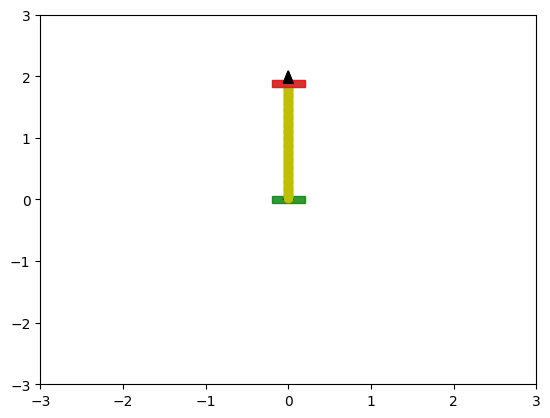

final robot pose:
    x = 1.154205115260395e-16
    y = 1.8849600000000017
    a = 1.5707963267948966


In [ ]:
# Speed options
LOW_SPEED = 12.5664
HIGH_SPEED = 18.8496

# Initial pose of the robot
px=0
py=0
ang = math.pi/2


print("This is a demo of a forward movement: (for 1 sec)")

# Create our PioBot
PioBot = DDRobot(px, py, ang)
PioBot.plot_robot("green")
PioBot.get_xya("initial ")

# TODO:----------------------------------------------------------------
# reset the speed values for left and right wheels as well as the time.
# so that the PioBot goes forward.
# Use function: set_rt_spd, move
# ---------------------------------------------------------------------

PioBot.set_rt_spd(rt_spd_l=HIGH_SPEED, rt_spd_r=HIGH_SPEED)
PioBot.move(seconds=1)

PioBot.plot_robot("red")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()
PioBot.get_xya("final ")

This is a demo of a backward movement: (for 1 sec)
initial robot pose:
    x = 0
    y = 0
    a = 1.5707963267948966


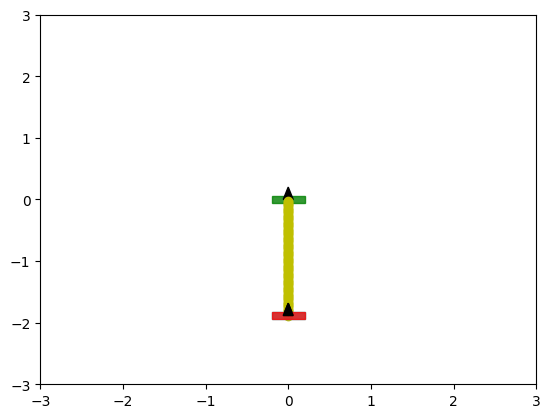

final robot pose:
    x = -1.154205115260395e-16
    y = -1.8849600000000017
    a = 1.5707963267948966


In [ ]:
print("This is a demo of a backward movement: (for 1 sec)")

# Create our PioBot
PioBot = DDRobot(px, py, ang)
PioBot.plot_robot("green")
PioBot.get_xya("initial ")

# TODO:----------------------------------------------------------------
# reset the speed values for left and right wheels as well as the time.
# so that the PioBot goes backward.
# Use function: set_rt_spd, move
# ---------------------------------------------------------------------

PioBot.set_rt_spd(rt_spd_l=-HIGH_SPEED, rt_spd_r=-HIGH_SPEED)
PioBot.move(seconds=1)

PioBot.plot_robot("red")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()
PioBot.get_xya("final ")

#### 2. Turning
If the velocities are different, the robot will spin. Try any combination in the cell below, by putting the appropriate values between the parentheses of the set_rt_spd function. You can edit and execute the cell as many times as you wish.

This is a demo of a turning movement: (for 1 sec)
initial robot pose:
    x = 0
    y = 0
    a = 1.5707963267948966


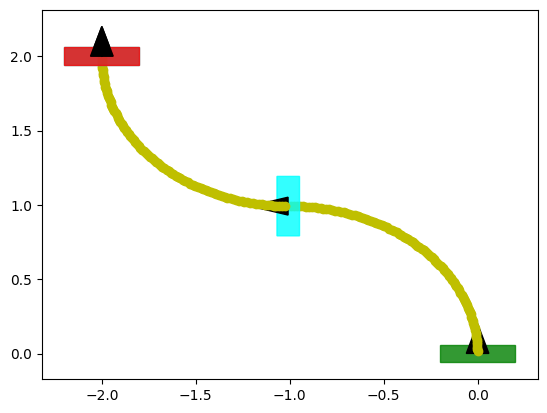

final robot pose:
    x = -1.9999662225460393
    y = 1.9999588762733855
    a = 1.5707963267948966


In [ ]:
print("This is a demo of a turning movement: (for 1 sec)")

# Create our PioBot
PioBot = DDRobot(px, py, ang)
PioBot.plot_robot("green")
PioBot.get_xya("initial ")

# TODO:----------------------------------------------------------------
# reset the speed values for left and right wheels as well as the time.
# so that the PioBot turns.
# Use function: set_rt_spd, move
# ---------------------------------------------------------------------

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=HIGH_SPEED)
PioBot.move(seconds=1)

PioBot.set_rt_spd(rt_spd_l=HIGH_SPEED, rt_spd_r=LOW_SPEED)
PioBot.move(seconds=1)


PioBot.plot_robot("red")
plt.show()
PioBot.get_xya("final ")

### Trajectories
A simple method of moving the robot along a predefined trajectory is to define a sequence of forward and turning motion steps with the specified amount of time. Suppose you have a PioBot and you want to control it to move and perform a sequence of the following actions, fill in the TODO section and complete the motor control of the robot.

0.  robotiv vehicle starts at (0,0) with initial orientation of 45 degrees
1.  move forward slowly for 1 second
2.  turn left for 1 second
3.  turn right for 2.5 seconds
4.  turn left for 2.5 seconds
5.  final position should be very close to (4,4)

initial robot pose:
    x = 0
    y = 0
    a = 0.7853981633974483


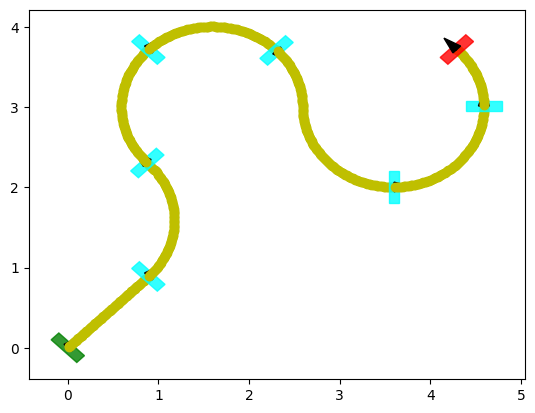

final robot pose:
    x = 4.291606979666249
    y = 3.7169443846254677
    a = 2.356198163397454


In [ ]:
# Speed options
LOW_SPEED = 12.5664
HIGH_SPEED = 18.8496

# Initial pose of the robot
px=0
py=0
ang = math.pi/4

# Create our PioBot
PioBot = DDRobot(px, py, ang)
PioBot.get_xya("initial ")
PioBot.plot_robot("green")

# TODO:----------------------------------------------------------------
# reset the speed values for left and right wheels as well as the time.
# so that the PioBot follows the instucted motion steps.
# Use function: set_rt_spd, move
# ---------------------------------------------------------------------

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=LOW_SPEED)
PioBot.move(seconds=1)

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=HIGH_SPEED)
PioBot.move(seconds=1)

PioBot.set_rt_spd(rt_spd_l=HIGH_SPEED, rt_spd_r=LOW_SPEED)
PioBot.move(seconds=2.5)

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=HIGH_SPEED)
PioBot.move(seconds=2.5)


PioBot.plot_robot("red")
plt.show()
PioBot.get_xya("final ")

### Obstacle Avoidance

Congratulations! Now let's find a safe trajectory for the PioBot so it reaches the yellow goal block without running into obstacles.


initial robot pose:
    x = 0
    y = 0
    a = 0.7853981633974483


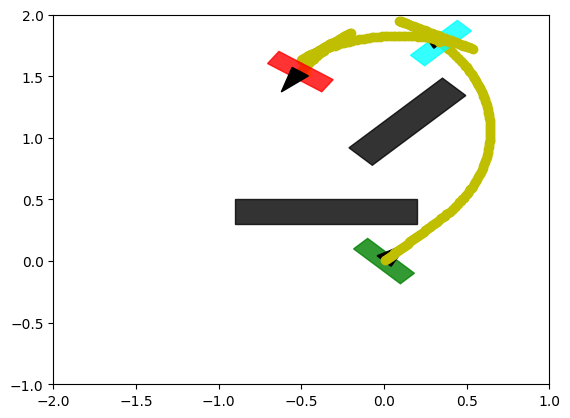

final robot pose:
    x = -0.506011297687513
    y = 1.538021525740274
    a = 4.102438163397459


In [ ]:
# Spead options
LOW_SPEED = 12.5664
HIGH_SPEED = 18.8496

# draw obstacles

plt.figure()
ax = plt.gca()
r1 = patches.Rectangle((-0.9,0.3), 1.1, 0.2, color="black", alpha=0.80)
r2 = patches.Rectangle((-0.8,0.5), 0.2, 0.8, color="black",  alpha=0.80)
r3 = patches.Rectangle((-0.5,1.5), 0.05, 0.1, color="yellow",  alpha=0.80)
t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
r2.set_transform(t2)
ax.add_patch(r1)
ax.add_patch(r2)
ax.add_patch(r3)
#Set the limits of the plot
plt.xlim([-2,1])
plt.ylim([-1,2])

# Initial pose of the robot
px=0
py=0
ang = math.pi/4

# Create our PioBot
PioBot = DDRobot(px, py, ang)
PioBot.get_xya("initial ")
PioBot.plot_robot("green")

# TODO:----------------------------------------------------------------
# Reset the speed values for left and right wheels as well as the time.
# so that the PioBot goes around all obstacles.
# Use function: set_rt_spd,  move
# ---------------------------------------------------------------------

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=LOW_SPEED)
PioBot.move(seconds=0.4)

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=HIGH_SPEED)
PioBot.move(seconds=1.2)

PioBot.set_rt_spd(rt_spd_l=-LOW_SPEED, rt_spd_r=-LOW_SPEED)
PioBot.move(seconds=0.4)

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=HIGH_SPEED)
PioBot.move(seconds=0.7)

PioBot.set_rt_spd(rt_spd_l=-LOW_SPEED, rt_spd_r=-LOW_SPEED)
PioBot.move(seconds=0.3)

PioBot.set_rt_spd(rt_spd_l=LOW_SPEED, rt_spd_r=17)
PioBot.move(seconds=0.3)


PioBot.plot_robot("red")
plt.show()
PioBot.get_xya("final ")